In [1]:
!pwd

/Users/apple/Desktop/projects/fact_checker_scraper/nbs


In [2]:
cd /Users/apple/Desktop/projects/fact_checker_scraper

/Users/apple/Desktop/projects/fact_checker_scraper


In [161]:
from app import scraper
import pprint
import re
from requests_html import HTML
from slugify import slugify

## Dubawa

In [4]:
# url = 'https://dubawa.org/is-lagos-largest-economy-in-africa-fact-checking-tinubus-claims-on-governorship-term/'
# url = 'https://dubawa.org/false-inec-did-not-extend-online-voter-registration/#'
# url = 'https://dubawa.org/is-it-true-coconut-water-stops-diarrhea/'
page_title = 'Cancer, Dracula & Leprechauns – Any Similarities?'
site_name = 'dubawa'

s = scraper.Scraper(page_title=page_title, endless_scroll=True, site_name=site_name)

In [104]:
html_str = s.get()



In [105]:
html_obj = HTML(html=html_str)

In [148]:
def extract_element_text(html_obj, element_id):
    el = html_obj.find(element_id, first=True)
    if not el:
        return ''
    return el.text

In [ ]:
# Title
# Author
# Page date
# Page banner/ image
# Page claim
# Page verdict

In [ ]:
d_title = extract_element_text(html_obj, '.post-title')
d_title

In [ ]:
d_author = extract_element_text(html_obj, '.author-name')
d_author

In [ ]:
d_page_date = extract_element_text(html_obj, '.date')
d_page_date

In [ ]:
def extract_element_src(html_obj, element_id):
    el = html_obj.find(element_id, first=True)
    if not el:
        return ''
    return el.attrs['src']

In [ ]:
d_page_banner = extract_element_src(html_obj,'.wp-post-image')
d_page_banner

In [ ]:
claim_list = []
d_claim = html_obj.find('.has-cyan-bluish-gray-background-color')
for claim in d_claim:
    claim_list.append(claim.text)
claim_list

In [ ]:
def extract_claim(html_obj, element_id):
    """
    returns a list of claims
    """
    claim_list = []
    el = html_obj.find(element_id)
    for claim in el:
        claim_list.append(claim.text)
    return claim_list

In [ ]:
d_claim = extract_claim(html_obj, '.has-cyan-bluish-gray-background-color')
d_claim

In [ ]:

verdict_dataset= {}
verdict_list = []
verdict_tag = []
verdicts_key = html_obj.find('.has-background')
verdicts_value = html_obj.find('.alignright img')

for i, v_strong in enumerate(verdicts_key):
    if i % 2 != 0:
        key = v_strong.text
        verdict_list.append(key)
for src in verdicts_value:
    image = src.attrs['src'].lower()
    verdict = image.split('/')[-1].split('-')[0]
    verdict_tag.append(verdict)
verdict_tag = list(set(verdict_tag))
# for i, key in enumerate(verdict_list):
#     verdict_dataset[key] = verdict_tag[i]
    

        
print(verdict_list)
print(verdict_tag)
print(verdict_dataset)

In [ ]:
def extract_verdicts(html_obj):
    verdict_dataset= {}
    verdict_list = []
    verdict_tag = []
    verdicts_key = html_obj.find('.has-background')
    verdicts_value = html_obj.find('.alignright img')

    for i, v_strong in enumerate(verdicts_key):
        if i % 2 != 0:
            key = v_strong.text
            verdict_list.append(key)
    for src in verdicts_value:
        image = src.attrs['src'].lower()
        verdict = image.split('/')[-1].split('-')[0]
        verdict_tag.append(verdict)
    verdict_tag = list(set(verdict_tag))
    for i, key in enumerate(verdict_list):
        try:
            verdict_dataset[key] = verdict_tag[i]
        except:
            pass
    return verdict_dataset
    

In [ ]:
extract_verdicts(html_obj)

In [ ]:
dataset = s.scrape()
pprint.pprint(dataset)

## Africa Check

In [8]:
page_title = 'No, former Twitter CEO Agrawal not arrested for child porn'
site_name = 'africacheck'

s = scraper.Scraper(page_title=page_title, endless_scroll=True, site_name=site_name)

In [9]:
html_str = s.get()

In [10]:
html_obj = HTML(html=html_str)
html_obj

<HTML url='https://example.org/'>

In [11]:
s.url

'https://africacheck.org/fact-checks/reports/no-former-twitter-ceo-agrawal-not-arrested-for-child-porn'

In [12]:
a_title = html_obj.find('.page-title', first=True)
a_title

In [ ]:
# html_str

## The cable

In [99]:
page_title = 'D’banj claims CREAM platform ‘valued above $100m’ — a year after launch'
# page_title = '‘Big mistake’ — Kwankwaso tackles Obasanjo, Edwin Clark over Obi endorsement'
site_name = 'thecable'

s = scraper.Scraper(page_title=page_title, endless_scroll=True, site_name=site_name)

In [100]:
html_str = s.get()

'<html xmlns="http://www.w3.org/1999/xhtml" lang="en-US" class=" js csstransforms3d"><!--<![endif]--><!-- BEGIN head --><head><script type="text/javascript" async="" src="https://static.criteo.net/js/ld/publishertag.prebid.117.js"></script><script type="text/javascript" async="async" id="true" src="https://q.addthis.com/feeds/1.0/views2.json?pubid=ra-5593899d4d915747&amp;domain=www.thecable.ng&amp;limit=50&amp;callback=_ate.cbs.fds_ra5593899d4d915747views2json0"></script><script type="text/javascript" src="https://api-public.addthis.com/url/shares.json?url=http%3A%2F%2Fwww.thecable.ng%2Fnnpc-denies-exporting-17-87m-barrels-of-oil-without-documentation&amp;callback=_ate.cbs.rcb_r1k0"></script><script type="text/javascript" src="https://api-public.addthis.com/url/shares.json?url=https%3A%2F%2Fwww.thecable.ng%2Fnnpc-denies-exporting-17-87m-barrels-of-oil-without-documentation&amp;callback=_ate.cbs.rcb_bupx0"></script><script type="text/javascript" src="https://api-public.addthis.com/url/s
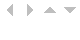

In [101]:
html_str

In [102]:
html_obj = HTML(html=html_str)
html_obj

<HTML url='https://example.org/'>

In [103]:
c_title = html_obj.find('.article-title', first=True).text
c_title

AttributeError: 'NoneType' object has no attribute 'text'

In [ ]:
c_author = html_obj.find('.right-side a')
words = []
for word in c_author:
    words.append(word.text)
author = words[1]
author

In [ ]:
c_page_date = html_obj.find('.calendar-date', first=True).text
c_page_date

In [ ]:
c_page_banner = html_obj.find('.setborder', first=True).attrs['src']
c_page_banner

In [ ]:
c_claim = html_obj.find('.shortcode-content p', first=True).text
print(c_claim)


In [ ]:
c_verdict = html_obj.find('.shortcode-content p visible')
c_verdict

## factcheckghana

In [106]:
page_title = 'Factbox: Three people die on the Accra-Tema motorway every month'
site_name = 'factcheckghana'

s = scraper.Scraper(page_title=page_title, endless_scroll=True, site_name=site_name)

In [107]:
html_str = s.get()

In [108]:
html_obj = HTML(html=html_str)
html_obj

<HTML url='https://example.org/'>

In [110]:
g_title = html_obj.find('.tdb-title-text', first=True).text
g_title

'Factbox: Three people die on the Accra-Tema motorway every month'

In [111]:
s.url

'https://www.fact-checkghana.com/factbox-three-people-die-on-the-accra-tema-motorway-every-month'

In [113]:
g_author = html_obj.find('.tdb-author-name', first=True).text
g_author

'Prosper Prince Midedzi'

In [117]:
g_date = html_obj.find('.entry-date', first=True).text
g_date

'December 14, 2022'

In [120]:
def extract_element_src(html_obj, element_id):
    el = html_obj.find(element_id, first=True)
    if not el:
        return ''
    return el.attrs['src']

In [121]:
g_banner = extract_element_src(html_obj, '.entry-thumb')
g_banner

'https://i0.wp.com/www.fact-checkghana.com/wp-content/uploads/2022/12/Tema-motarway-accident.jpeg?resize=992%2C744&ssl=1'

In [147]:
g_claim = html_obj.find('.tdb-block-inner p strong', first=True).text
g_claim

'Tema Motorway, the fastest and easiest route to Accra from Ghana’s industrial city, has become one of the most dangerous roads in Ghana.'

In [150]:
g_claim = extract_element_text(html_obj, '.tdb-block-inner p strong')
g_claim

'Tema Motorway, the fastest and easiest route to Accra from Ghana’s industrial city, has become one of the most dangerous roads in Ghana.'

In [153]:
def factcheckghana_extract_claim(html_obj, element_id):
    """
    returns a list of claims
    """
    claim_list = []
    claim = extract_element_text(html_obj, '.tdb-block-inner p strong')
    claim_list.append(claim)
    return claim_list

In [154]:
factcheckghana_extract_claim(html_obj, '.tdb-block-inner p strong')

['Tema Motorway, the fastest and easiest route to Accra from Ghana’s industrial city, has become one of the most dangerous roads in Ghana.']

In [166]:
def factcheckghana_extract_verdicts():
    verdicts_dict = {}
    g_verdict = html_obj.find('.tdb-title-text', first=True).text
    for word in slugify(g_verdict.lower()).split('-'):
        if word == 'factbox' or word == 'fact' or word == 'facts':
            verdicts_dict['fact'] = 'True'
        elif word == 'false' or word == 'not':
            verdicts_dict['false'] = 'False'
        elif word == 'misleading':
            verdicts_dict['misleading'] = 'Misleading'
    return verdicts_dict
    

{'fact': 'True'}